In [22]:
import pandas as pd
from sklearn.linear_model import LogisticRegression


# Load data
train = pd.read_csv("mnist_train.csv")

# Filter data: keep only labels 3 and 5
training_data = train[(train['label'] == 3) | (train['label'] == 5)].copy()

# Convert labels: 1 if label is 3, 0 if label is 5
training_data['label'] = (training_data['label'] == 3).astype(int)
X = training_data.drop(columns='label')
y = training_data['label']

In [24]:
# Fit logistic regression model
model = LogisticRegression(penalty = None,solver='lbfgs', max_iter = 10000) 
model.fit(X, y)

LogisticRegression(max_iter=10000, penalty=None)

In [26]:
from sklearn.metrics import roc_curve, auc
test = pd.read_csv("mnist_test.csv")
test_data = test[(test['label'] == 3) | (test['label'] == 5)].copy()
test_data['label'] = (test_data['label'] == 3).astype(int)
X_test = test_data.drop(columns='label')
y_test = test_data['label']

predictions = model.predict_proba(X_test)[:, 1]  # Get the probability for class 1 (label 3)
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
# Calculate AUC|
auc_value = auc(fpr, tpr)

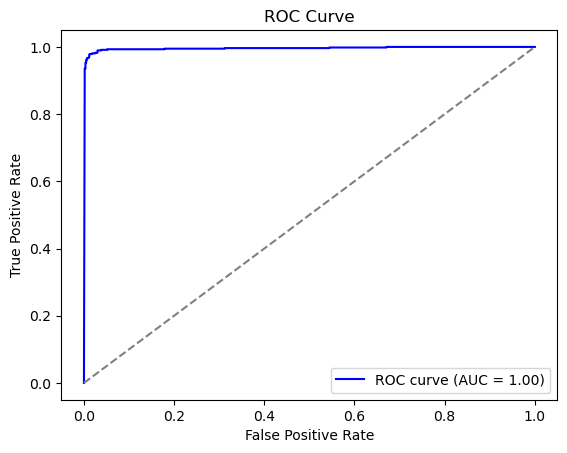

In [28]:
# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [34]:
# Print AUC value
print(f'AUC: {auc_value:.6f}')

AUC: 0.995513
